# ppg.ipynb
Functions to examine rolling correlations between device sensor outputs.

Authors:  
– Jon Clucas, 2017 jon.clucas@childmind.org  
– Arno Klein, 2017  
© 2017, Child Mind Institute, Apache v2.0 License

setup:

In [1]:
%matplotlib inline
from annotate_range import annotation_line
from astropy.stats import median_absolute_deviation as mad
from chart_data import bland_altman_plot, df_devices, write_csv
from chart_data_ppg import linechart
from config import short_dir, test_urls
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
from normalize_acc_data import actigraph_acc, geneactiv_acc
from plot_normalized_vector_lengths import demean_and_normalize
from utilities.fetch_data import fetch_check_data, fetch_data, fetch_hash
import json, matplotlib as mpl, numpy as np, os, pandas as pd, matplotlib.pyplot as plt
"""
with open(os.path.join('./line_charts/device_colors.json')) as fp:
    color_key = json.load(fp)
"""
pd.set_option('mode.use_inf_as_null', True)
ppg_hashes = {'Wavelet_ppg': '1af7572640aea22a0af354bedbeb7a1e',
              'E4_ppg': '74a4074802c03fa22fb3ae8a6715263b'}
if not os.path.exists('./sample_data'):
    os.makedirs('./sample_data')

### PPG
E4 has a 'Timestamp' column and a combined red and green data column.
Wavelet has a 'Timestamp' column and four data columns: red, infrared, filtered red, and filtered infrared

In [2]:
df = df_devices(['E4', 'Wavelet'], 'ppg', datetime(2017, 4, 7, 17), datetime(2017, 4, 7, 20), ppg_hashes)

Retrieve file from URL: https://osf.io/v3ad6/?action=download&version=2
Copy file to cache: sample_data/74a4074802c03fa22fb3ae8a6715263b/E4_ppg.csv
Retrieve file from URL: https://osf.io/c5b9z/?action=download&version=1
Copy file to cache: sample_data/1af7572640aea22a0af354bedbeb7a1e/Wavelet_ppg.csv


In [3]:
print(demean_and_normalize(df))

                               nW  infrared  red  infrared_filtered  \
Timestamp                                                             
2017-04-07 17:00:06.000  0.017253       NaN  NaN                NaN   
2017-04-07 17:00:07.000 -0.118227       NaN  NaN                NaN   
2017-04-07 17:00:20.000 -0.037940       NaN  NaN                NaN   
2017-04-07 17:00:27.000 -0.153710       NaN  NaN                NaN   
2017-04-07 17:00:50.000  0.086252       NaN  NaN                NaN   
2017-04-07 17:00:55.000 -0.034527       NaN  NaN                NaN   
2017-04-07 17:01:10.000  0.021739       NaN  NaN                NaN   
2017-04-07 17:01:11.000 -0.160313       NaN  NaN                NaN   
2017-04-07 17:01:24.000 -0.027948       NaN  NaN                NaN   
2017-04-07 17:01:31.000 -0.148303       NaN  NaN                NaN   
2017-04-07 17:01:54.000  0.079972       NaN  NaN                NaN   
2017-04-07 17:01:59.000 -0.039734       NaN  NaN                NaN   
2017-0

Plotting...


/Users/jon.clucas/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/jon.clucas/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/jon.clucas/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/jon.clucas/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


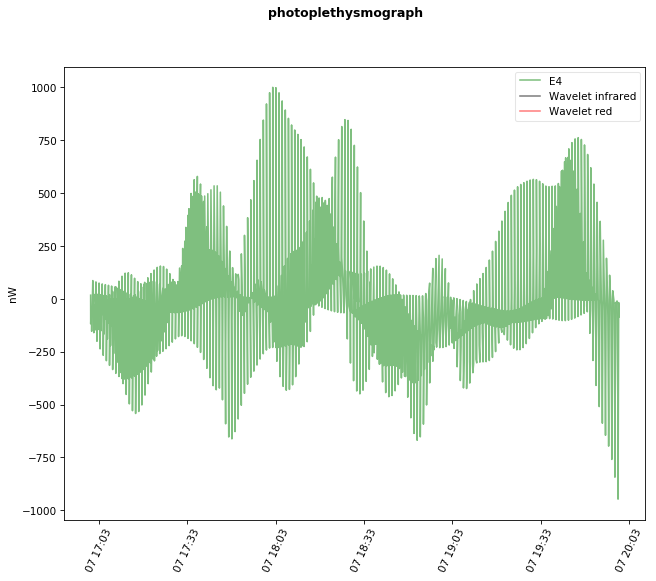

In [4]:
linechart(demean_and_normalize(df))